<a href="https://colab.research.google.com/github/vaibhav2903/deepfakeDetection/blob/main/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive/')
file_path_X = '/content/drive/MyDrive/X_data.npy'
np_data_X = np.load(file_path_X)

Mounted at /content/drive/


In [ ]:
import numpy as np
file_path_Y = '/content/drive/MyDrive/Y_data.npy'
np_data_Y = np.load(file_path_Y)

In [ ]:
features_test = np_data_X[7001:13000]
labels_test = np_data_Y[7001:13000]

In [ ]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# features_train, features_test, labels_train, labels_test = train_test_split(np_data_X, np_data_Y, test_size=0.2, random_state=42)

In [ ]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/my_cnn_model1.h5')

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np
from tensorflow.keras import models

In [ ]:
features_test[0].shape

(224, 224, 3)

array([[[110, 142, 153],
        [110, 142, 153],
        [108, 142, 153],
        ...,
        [100, 110, 125],
        [100, 111, 125],
        [100, 111, 125]],

       [[110, 142, 153],
        [110, 142, 153],
        [108, 141, 153],
        ...,
        [100, 110, 125],
        [100, 111, 125],
        [100, 111, 125]],

       [[109, 141, 152],
        [109, 141, 152],
        [108, 141, 153],
        ...,
        [101, 110, 125],
        [101, 111, 125],
        [101, 111, 125]],

       ...,

       [[114, 104,  99],
        [114, 104,  99],
        [114, 103,  99],
        ...,
        [ 54,  47,  62],
        [ 51,  44,  59],
        [ 51,  44,  59]],

       [[115, 104, 100],
        [115, 104, 100],
        [114, 103, 100],
        ...,
        [ 56,  49,  64],
        [ 54,  47,  62],
        [ 54,  47,  62]],

       [[115, 104, 100],
        [115, 104, 100],
        [114, 104,  99],
        ...,
        [ 56,  49,  64],
        [ 54,  47,  62],
        [ 54,  47,  62]]], dtype=uint8)
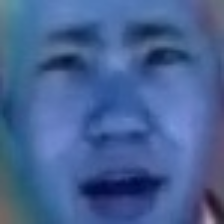

In [ ]:
np_data_X[14000]

In [ ]:
predictions_prob = model.predict(features_test)
predictions = (predictions_prob > 0.5).astype("int32")

188/188 [==============================] - 272s 1s/step


In [ ]:
cm = confusion_matrix(labels_test, predictions)

In [ ]:
cm1

NameError: name 'cm1' is not defined

In [ ]:
# # define a masker that is used to mask out partitions of the input image.
# masker = shap.maskers.Image("inpaint_telea", features_test[2000].shape)

# # create an explainer with model and image masker
# explainer = shap.Explainer(model, masker, output_names=["Real","Fake"])

# # here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
# shap_values = explainer(
#     features_test[131:132], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [01:03, 63.13s/it]               


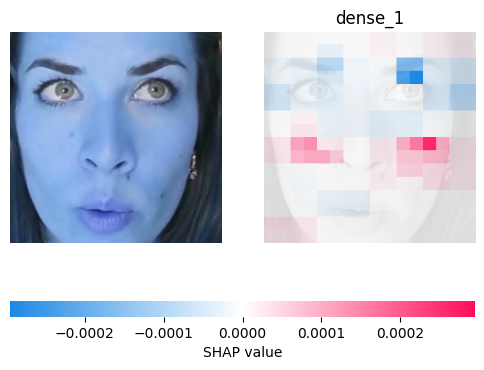

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[0:1], max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[0].shape)
shap_values_all = []
for i in range(6996,7086):

  if i!=63:
      # create an explainer with model and image masker
      explainer_blur = shap.Explainer(model, masker_blur)

      # here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
      shap_values_fine = explainer_blur(
        np_data_X[i:i+1], max_evals=300, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
      )
      shap_values_all.append(shap_values_fine)

      # # output with shap values
      # shap.image_plot(shap_values_fine)

  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:22, 22.28s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.32s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.21s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.01s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.87s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.04s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.08s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:19, 19.06s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.61s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.40s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.59s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.64s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.77s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.61s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.68s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.48s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.64s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:18, 18.59s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.28s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.33s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.96s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.02s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.00s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.42s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.08s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.54s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.33s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.44s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.29s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:18, 18.61s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.47s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.42s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.59s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.66s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:17, 17.06s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.28s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.41s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:16, 16.48s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:19, 19.72s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]



PartitionExplainer explainer: 2it [00:18, 18.08s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.96s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.97s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.15s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.17s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.18s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.37s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.51s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.63s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.18s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.20s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.20s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.63s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.24s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.64s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:17, 17.21s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.06s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.38s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.53s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.45s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.37s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.93s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.42s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.54s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:17, 17.06s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.49s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.57s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.59s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.25s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.06s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.93s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.91s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.06s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.91s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:17, 17.28s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.12s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:17, 17.93s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.60s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:25, 25.69s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.45s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.28s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:17, 17.52s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.35s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.58s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.37s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.90s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:19, 19.19s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.73s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.62s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.23s/it]               


  0%|          | 0/298 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:17, 17.52s/it]               


In [ ]:
def shap_to_mask(shap_values, threshold):
    # Convert SHAP values to absolute values to consider overall impact
    abs_shap = np.abs(shap_values.values[0])
    # Create a mask where SHAP values above the threshold are set to 1
    return abs_shap >= np.percentile(abs_shap, threshold)

In [ ]:
threshold = 80

# Generate masks for all 10 images
masks_shap_val = [shap_to_mask(shap_values_all[i], threshold) for i in range(1,10)]

In [ ]:
jaccard_indices = np.zeros((9, 9))  # A 10x10 matrix to hold the Jaccard indices

for i in range(9):
    for j in range(i, 9):  # Use 'j = i' to avoid repeating calculations
        if i == j:
            jaccard_indices[i, j] = 1  # The Jaccard index for an image with itself is 1
        else:
            intersection = np.logical_and(masks_shap_val[i], masks_shap_val[j]).sum()
            union = np.logical_or(masks_shap_val[i], masks_shap_val[j]).sum()
            jaccard_indices[i, j] = intersection / union
            jaccard_indices[j, i] = jaccard_indices[i, j]  # Fill in the symmetric value

# jaccard_indices now contains the Jaccard index between each pair of images
# print(jaccard_indices)

In [ ]:
upper_triangle_indices = np.triu_indices(10, k=1)
jaccard_values = jaccard_indices[upper_triangle_indices]
from scipy import stats
# Calculate mean, median, and mode
mean_jaccard = np.mean(jaccard_values)
median_jaccard = np.median(jaccard_values)
# mode_jaccard = stats.mode(jaccard_values)[0][0]  # stats.mode returns mode and count

mean_jaccard, median_jaccard
#, mode_jaccard

(0.3377039178577392, 0.3587866108786611)

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [05:27, 327.45s/it]              


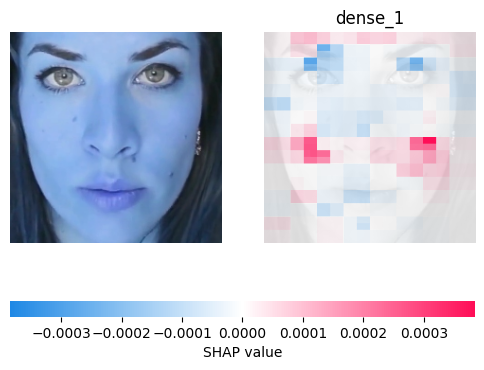

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[1].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[1:2], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:09, 249.31s/it]              


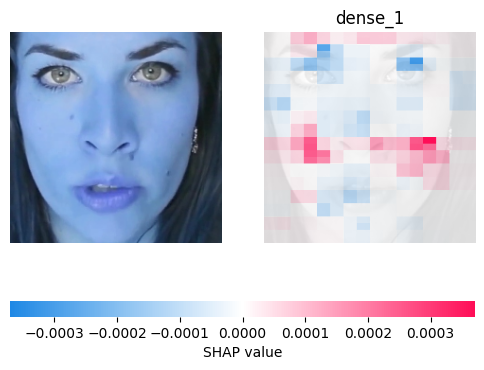

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[2].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[2:3], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

In [ ]:
shap_values = shap_values_fine.values[0]

In [ ]:
shap_values

array([[[[3.87779712e-06],
         [3.87779712e-06],
         [3.87779712e-06]],

        [[3.87779712e-06],
         [3.87779712e-06],
         [3.87779712e-06]],

        [[3.87779712e-06],
         [3.87779712e-06],
         [3.87779712e-06]],

        ...,

        [[7.05232790e-06],
         [7.05232790e-06],
         [7.05232790e-06]],

        [[7.05232790e-06],
         [7.05232790e-06],
         [7.05232790e-06]],

        [[7.05232790e-06],
         [7.05232790e-06],
         [7.05232790e-06]]],


       [[[3.87779712e-06],
         [3.87779712e-06],
         [3.87779712e-06]],

        [[3.87779712e-06],
         [3.87779712e-06],
         [3.87779712e-06]],

        [[3.87779712e-06],
         [3.87779712e-06],
         [3.87779712e-06]],

        ...,

        [[7.05232790e-06],
         [7.05232790e-06],
         [7.05232790e-06]],

        [[7.05232790e-06],
         [7.05232790e-06],
         [7.05232790e-06]],

        [[7.05232790e-06],
         [7.05232790e-06],
   

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:32, 272.39s/it]              


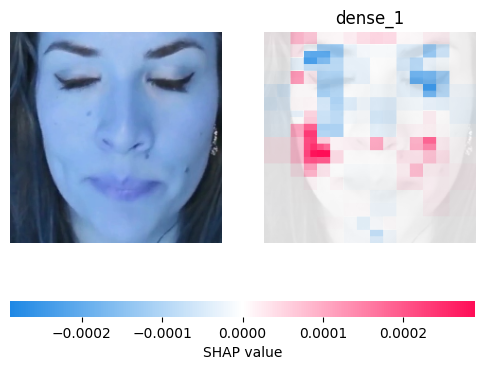

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[3].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[3:4], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:11, 251.46s/it]              


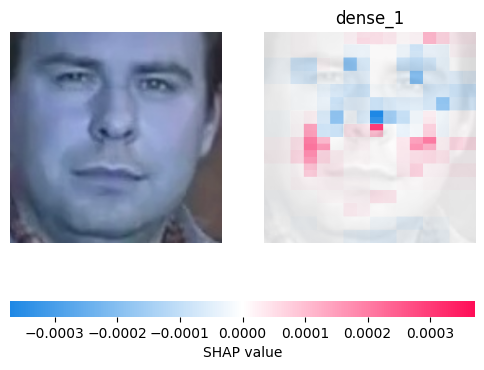

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[4].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[4:5], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[5].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[5:6], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

NameError: name 'shap' is not defined

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:15, 255.20s/it]              


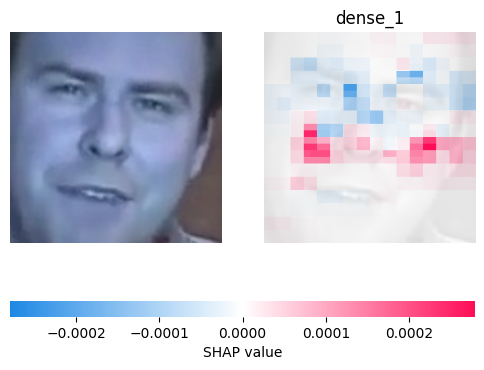

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[6].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[6:7], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:15, 255.36s/it]              


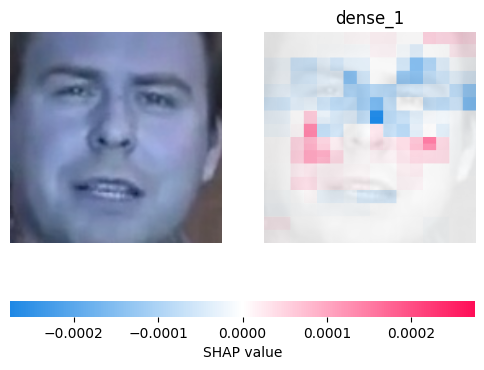

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[7].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[7:8], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:29, 269.35s/it]              


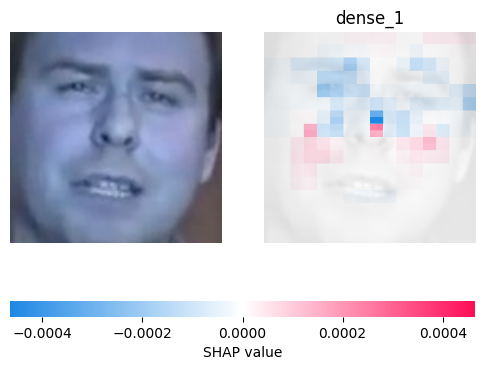

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[8].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[8:9], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:27, 267.04s/it]              


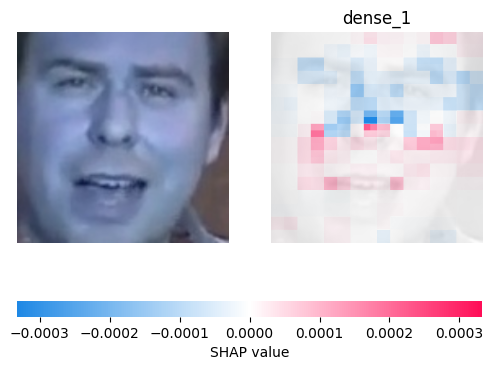

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[9].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[9:10], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:30, 270.28s/it]              


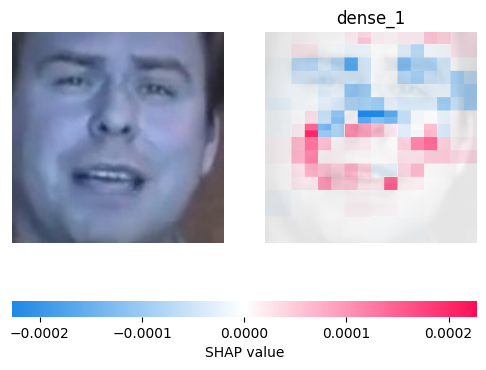

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[10].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[10:11], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)
# output with shap values
shap.image_plot(shap_values_fine)

In [ ]:
sort_order = "positive"
perturbation = "keep"

In [ ]:
shap_values_fine.values

array([[[[[ 1.13399962e-07],
          [ 1.13399962e-07],
          [ 1.13399962e-07]],

         [[ 1.13399962e-07],
          [ 1.13399962e-07],
          [ 1.13399962e-07]],

         [[ 1.13399962e-07],
          [ 1.13399962e-07],
          [ 1.13399962e-07]],

         ...,

         [[ 6.67956588e-06],
          [ 6.67956588e-06],
          [ 6.67956588e-06]],

         [[ 6.67956588e-06],
          [ 6.67956588e-06],
          [ 6.67956588e-06]],

         [[ 6.67956588e-06],
          [ 6.67956588e-06],
          [ 6.67956588e-06]]],


        [[[ 1.13399962e-07],
          [ 1.13399962e-07],
          [ 1.13399962e-07]],

         [[ 1.13399962e-07],
          [ 1.13399962e-07],
          [ 1.13399962e-07]],

         [[ 1.13399962e-07],
          [ 1.13399962e-07],
          [ 1.13399962e-07]],

         ...,

         [[ 6.67956588e-06],
          [ 6.67956588e-06],
          [ 6.67956588e-06]],

         [[ 6.67956588e-06],
          [ 6.67956588e-06],
          [ 6.679565

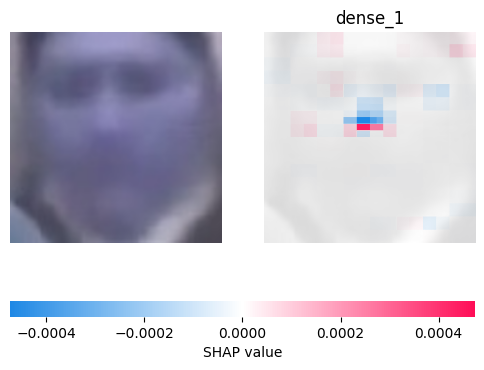

In [ ]:
shap.image_plot(shap_values_fine)

In [ ]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", features_test[2000].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
   features_test[2000:2001], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:10, 250.08s/it]              


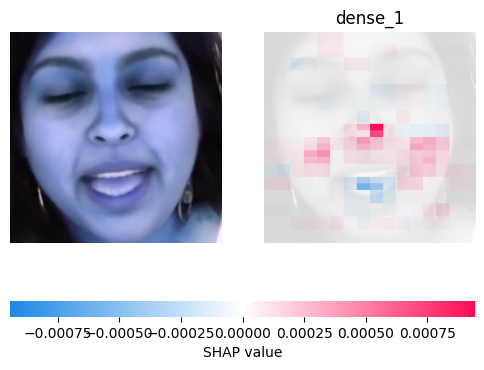

In [ ]:
shap.image_plot(shap_values_fine)

In [ ]:
def explain_instance_shap(image, classifier, segments, number_features):
    import shap
    import numpy as np

    # define a function that depends on a binary mask representing if an image region is hidden
    def mask_image(zs, segmentation, image, background=None):
        if background is None:
            background = image.mean((0,1))
        out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
        for i in range(zs.shape[0]):
            out[i,:,:,:] = image
            for j in range(zs.shape[1]):
                if zs[i,j] == 0:
                    out[i][segmentation == j,:] = background
        return out
    def f(z):
        return classifier.predict(mask_image(z, segments, image))

    # use Kernel SHAP to explain the network's predictions
    n_segments = len(np.unique(segments))
    explainer = shap.KernelExplainer(f, np.zeros((1,n_segments)))
    shap_values = explainer.shap_values(np.ones((1,n_segments)), nsamples=1000)

    relevant_shap = shap_values[np.argmax(classifier.predict(image[np.newaxis, ...])[0], axis = -1)]
    ranked_segments = np.argsort(-relevant_shap)

    explanation = np.full([image.shape[0],image.shape[1],image.shape[2]],0/255.0)
    for i in ranked_segments[0,0:number_features]:
        explanation[segments == i] = image[segments == i]

    segments_in_explanation = ranked_segments[0,0:number_features]
    return explanation, segments_in_explanation

1/1 [==============================] - 0s 90ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 84ms/step


(-0.5, 223.5, 223.5, -0.5)

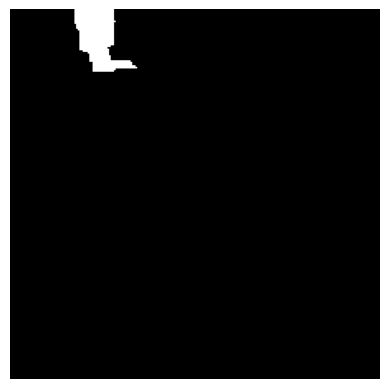

In [ ]:
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed, mark_boundaries
segments = quickshift(features_test[300], kernel_size=4, max_dist=200, ratio=0.2)
explanation_shap, segments_in_shap_explanation = explain_instance_shap(features_test[300], model, segments, 1)

# stop = time.time()
# print('Time elapsed: ' + str(stop-start))

plt.imshow(explanation_shap)
plt.axis('Off')

array([[[183, 187, 201],
        [183, 187, 201],
        [183, 189, 202],
        ...,
        [ 54,  32,  26],
        [ 56,  34,  28],
        [ 59,  37,  31]],

       [[172, 175, 189],
        [172, 175, 189],
        [171, 177, 190],
        ...,
        [ 54,  32,  26],
        [ 56,  34,  28],
        [ 58,  36,  30]],

       [[133, 136, 150],
        [133, 137, 150],
        [132, 138, 151],
        ...,
        [ 55,  33,  27],
        [ 55,  34,  28],
        [ 57,  35,  29]],

       ...,

       [[ 54,  47,  67],
        [ 54,  48,  67],
        [ 54,  48,  66],
        ...,
        [ 53,  37,  38],
        [ 54,  37,  38],
        [ 54,  37,  38]],

       [[ 54,  48,  67],
        [ 54,  48,  66],
        [ 55,  49,  66],
        ...,
        [ 53,  37,  38],
        [ 53,  37,  38],
        [ 53,  37,  38]],

       [[ 54,  48,  65],
        [ 54,  48,  65],
        [ 56,  49,  65],
        ...,
        [ 53,  37,  38],
        [ 53,  37,  38],
        [ 53,  37,  38]]], dtype=uint8)
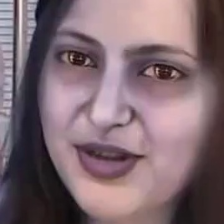

In [ ]:
np_data_X[10099]

In [ ]:
masker_blur = shap.maskers.Image("blur(128,128)", features_test[0].shape)
shap_values_all = []
for i in range(10018,10027):

  if i!=63:
      # create an explainer with model and image masker
      explainer_blur = shap.Explainer(model, masker_blur)

      # here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
      shap_values_fine = explainer_blur(
        np_data_X[i:i+1], max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
      )
      shap_values_all.append(shap_values_fine)

  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:57, 57.75s/it]               


  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:55, 55.80s/it]               


  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:57, 57.40s/it]               


  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:55, 55.87s/it]               


  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:56, 56.92s/it]               


  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:58, 58.18s/it]               


  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:56, 56.36s/it]               


  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:57, 57.66s/it]               


  0%|          | 0/998 [00:00<?, ?it/s]


PartitionExplainer explainer: 2it [00:57, 57.14s/it]               


In [ ]:
import numpy as np

def shap_to_mask(shap_values, threshold):
    # Convert SHAP values to absolute values to consider overall impact
    abs_shap = np.abs(shap_values.values[0])
    # Create a mask where SHAP values above the threshold are set to 1
    return abs_shap >= np.percentile(abs_shap, threshold)

# Assuming shap_values_fine contains SHAP values for 10 images
threshold = 80

# Generate masks for all 10 images
masks = [shap_to_mask(shap_values_all[i], threshold) for i in range(9)]

# Calculate the Jaccard index for each pair of images
jaccard_indices = np.zeros((9, 9))  # A 10x10 matrix to hold the Jaccard indices

for i in range(9):
    for j in range(i, 9):  # Use 'j = i' to avoid repeating calculations
        if i == j:
            jaccard_indices[i, j] = 1  # The Jaccard index for an image with itself is 1
        else:
            intersection = np.logical_and(masks[i], masks[j]).sum()
            union = np.logical_or(masks[i], masks[j]).sum()
            jaccard_indices[i, j] = intersection / union
            jaccard_indices[j, i] = jaccard_indices[i, j]  # Fill in the symmetric value

# jaccard_indices now contains the Jaccard index between each pair of images
#print(jaccard_indices)
np.mean(jaccard_indices)

NameError: name 'shap_values_all' is not defined

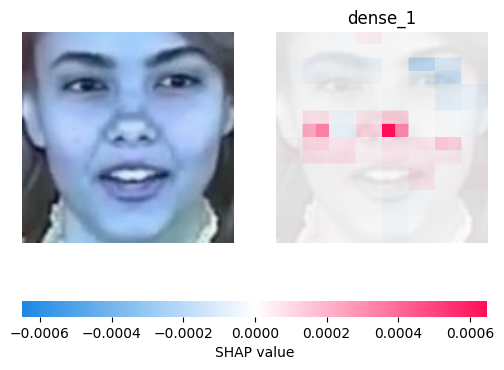

In [ ]:
shap.image_plot(shap_values_all[7])

In [ ]:
mean_jaccard_list = []
median_jaccard_list = []

In [ ]:
upper_triangle_indices = np.triu_indices(9, k=1)
jaccard_values = jaccard_indices[upper_triangle_indices]
from scipy import stats
# Calculate mean, median, and mode
mean_jaccard = np.mean(jaccard_values)
median_jaccard = np.median(jaccard_values)
# mode_jaccard = stats.mode(jaccard_values)[0][0]  # stats.mode returns mode and count

mean_jaccard_list.append(mean_jaccard)
median_jaccard_list.append(median_jaccard)
#mean_jaccard, median_jaccard

In [ ]:
np.mean(mean_jaccard_list)

0.3731872238417716

In [ ]:
np.mean(median_jaccard_list)

0.3618463648395903

array([[[153, 140, 148],
        [152, 141, 150],
        [161, 151, 162],
        ...,
        [165, 169, 180],
        [166, 171, 182],
        [165, 171, 182]],

       [[153, 140, 148],
        [150, 139, 148],
        [157, 147, 159],
        ...,
        [163, 167, 177],
        [165, 169, 180],
        [166, 171, 182]],

       [[153, 140, 148],
        [149, 137, 146],
        [145, 135, 147],
        ...,
        [163, 165, 175],
        [165, 168, 179],
        [169, 173, 183]],

       ...,

       [[ 37,  27,  27],
        [ 37,  27,  27],
        [ 37,  27,  27],
        ...,
        [ 48,  37,  33],
        [ 47,  35,  32],
        [ 46,  34,  32]],

       [[ 36,  28,  28],
        [ 37,  28,  28],
        [ 37,  28,  28],
        ...,
        [ 48,  36,  33],
        [ 46,  34,  32],
        [ 46,  34,  32]],

       [[ 36,  28,  28],
        [ 36,  28,  28],
        [ 37,  29,  29],
        ...,
        [ 47,  35,  33],
        [ 46,  34,  32],
        [ 45,  33,  31]]], dtype=uint8)
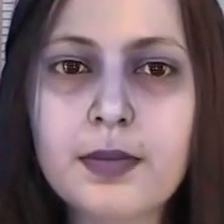

In [ ]:
np_data_X[10107]

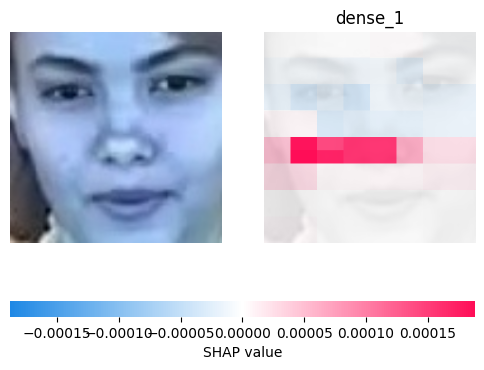

In [ ]:
shap.image_plot(shap_values_all[0])